<a href="https://colab.research.google.com/github/voltanz/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama      : Ahmad Bima Tristan Ibrahim
# Nim       : 2141720077
# No Absen  : 1
# Kelas     : TI - 3F

### **PRAKTIKUM**

1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang
terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.

Lanjutkan dengan membuat notebook baru dan ubah nama file menjadi “Week3.ipynb”.
Perhatian: Jangan lupa untuk menyimpan salinan ke Github setelah melakukan
perubahan / ketika Anda sudah selesai melakukan praktikum.

2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Ikuti alur autorisasinya hingga muncul pesan: “Mounted at /content/drive”.

3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

            𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏


dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


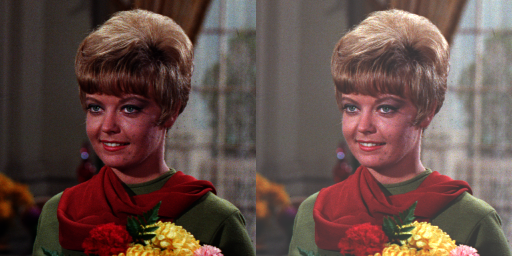

In [6]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
      print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week 3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

**Jawab:** Jawab: Inverse Citra adalah proses yang digunakan untuk membalik nilai citra dengan cermin nilai pixel tengah. Hasil yang didapatkan dikenal dengan nama citra negative. Proses ini juga mudah sekali karena operasinya hanya mengurangkan nilai 255 dengan nilai pixel merah, hijau, dan biru.

𝑔(𝑥) = 255 − 𝑓(𝑥) , dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli

Jadi jika nilai pixel asli 255, dengan operasi ini hasilnya akan bernilai 0 (karena 255 – 255).

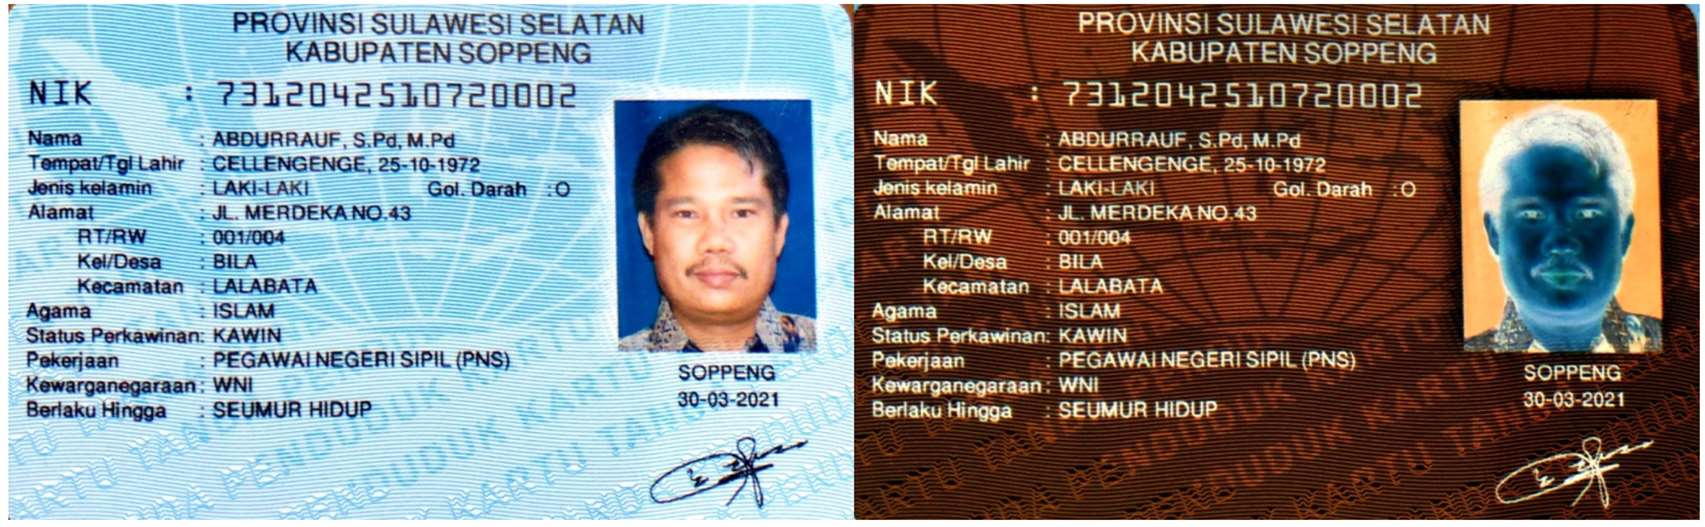

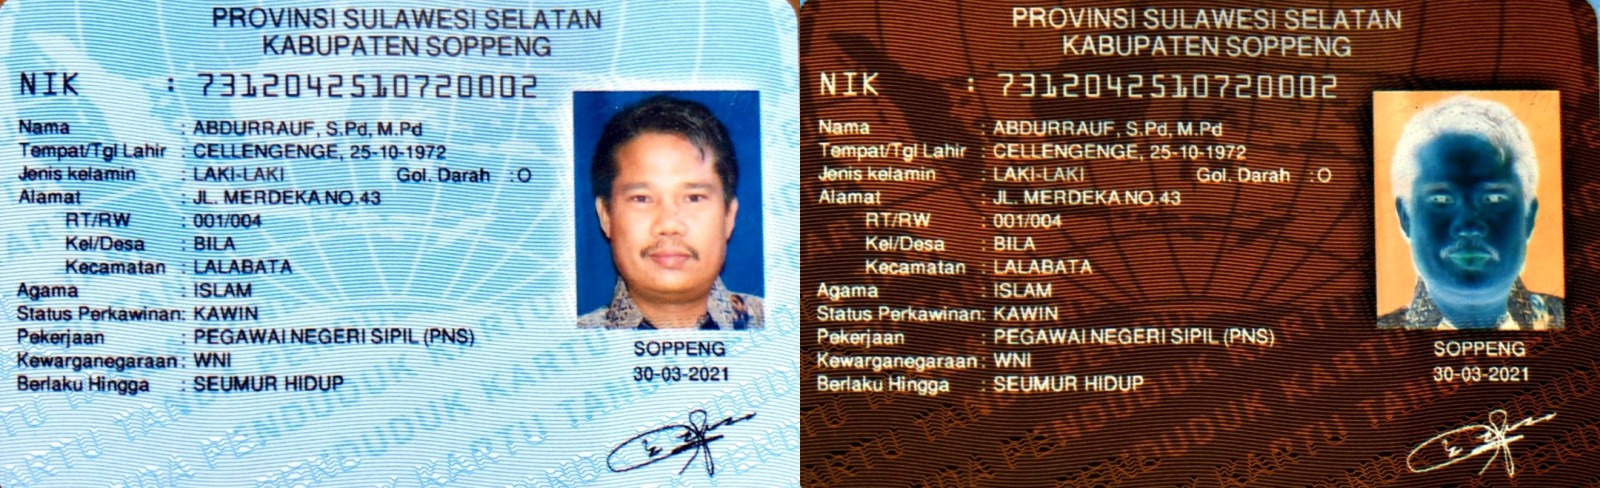

In [14]:
original = cv.imread('/content/drive/MyDrive/PCVK/Week 3/KTP.jpg')
inversed_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inversed_image[y,x,c] = np.clip(255 - base_image[y,x,c], 0, 255)

#cara simple tanpa for loop
#inversed_image = cv.convertScaleAbs(original, beta=inversed)

final_frame = cv.hconcat((original, inversed_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

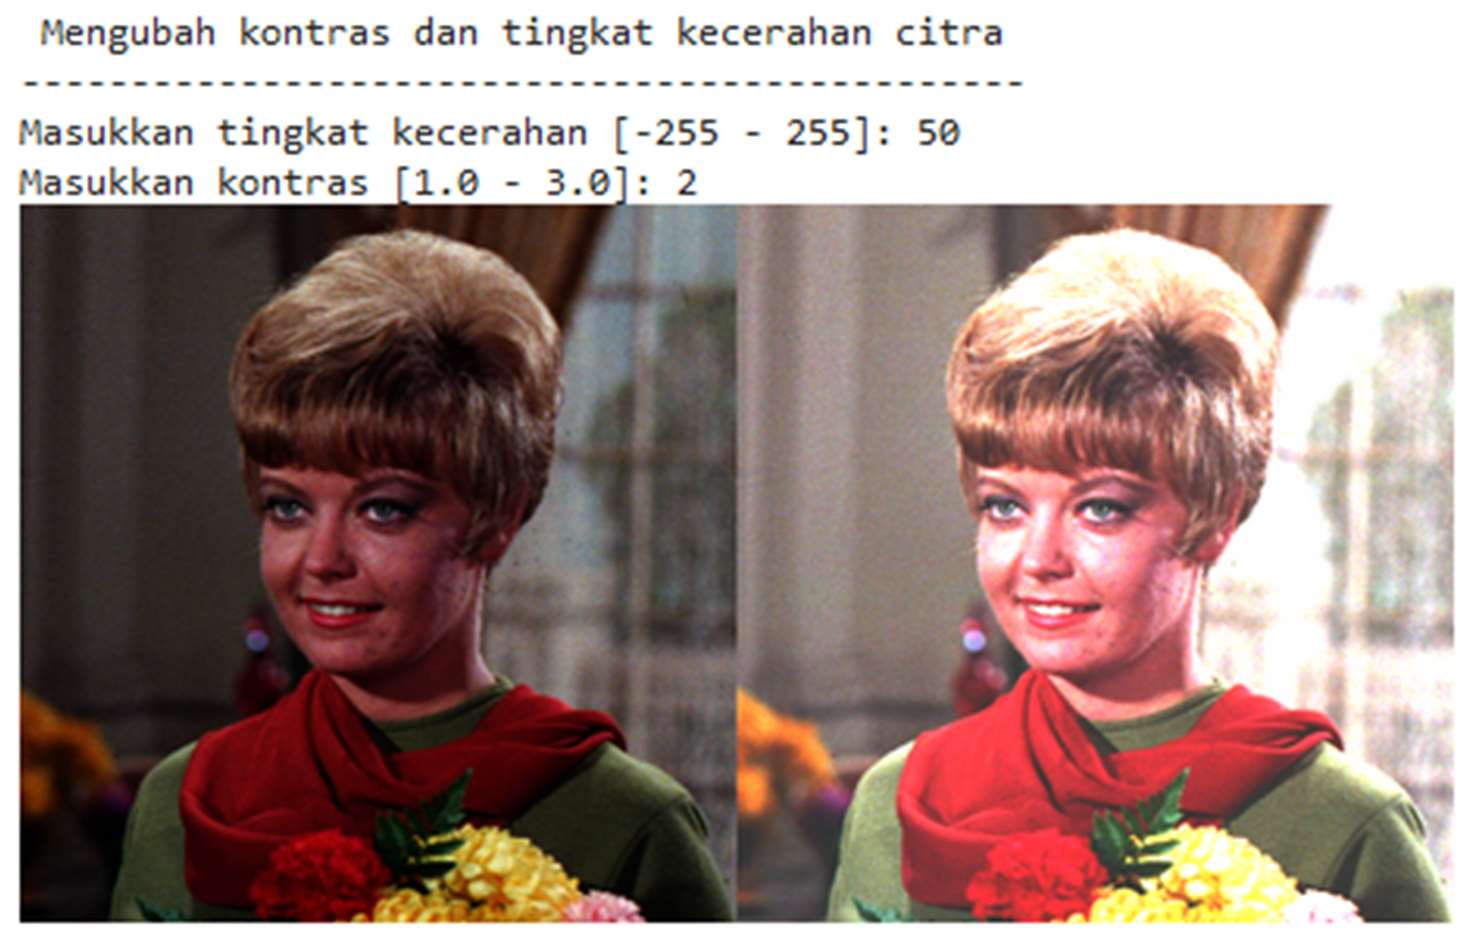

**Jawab:** Operasi contrast dapat dilakukan dengan memodifikasi formula yang digunakan pada linier brightness, yaitu:

𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


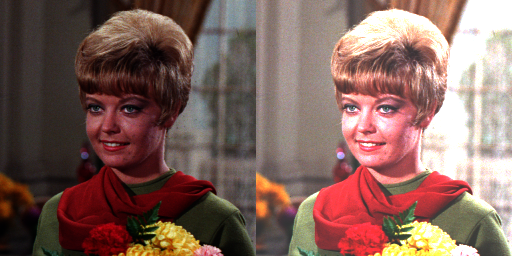

In [37]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week 3/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

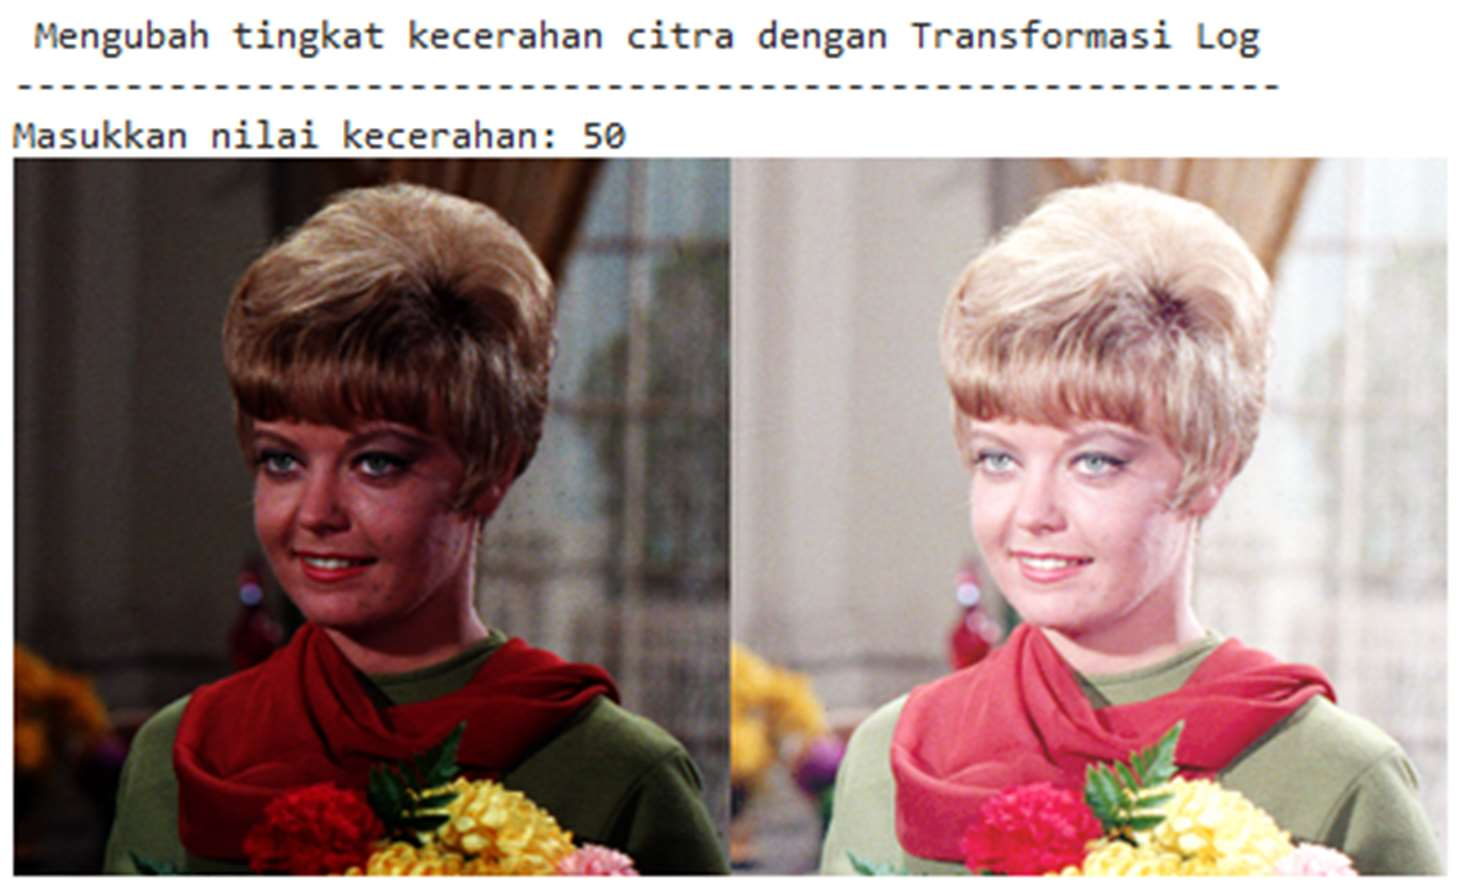

**Jawab:** Secara umum bentuk dari transfomasi log adalah:

𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)

dimana:

c : konstanta

r : nilai grey-level citra input

s : nilai grey-level citra output

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------------------
Masukkan nilai kecerahan:50


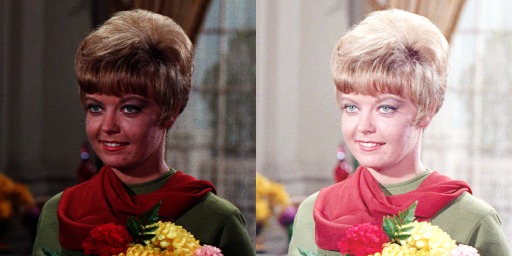

In [19]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week 3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging
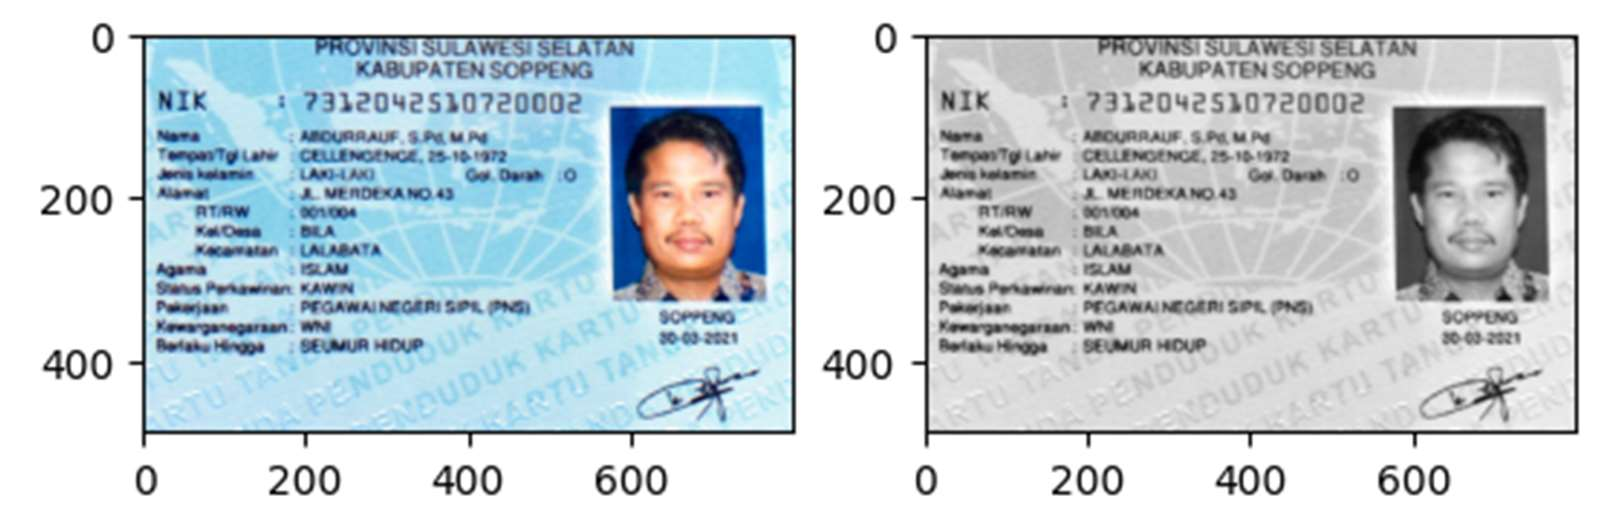

a. Averaging


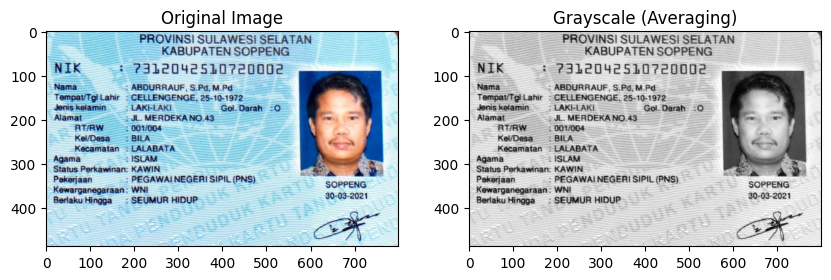

In [25]:
# Averaging
import cv2
import numpy as np
from matplotlib import pyplot as plt

base_image = cv2.imread('/content/drive/MyDrive/PCVK/Week 3/KTP.jpg')

# Implementasi Grayscale menggunakan metode Averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(10, 5))
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')


plt.show()

b. Lightness
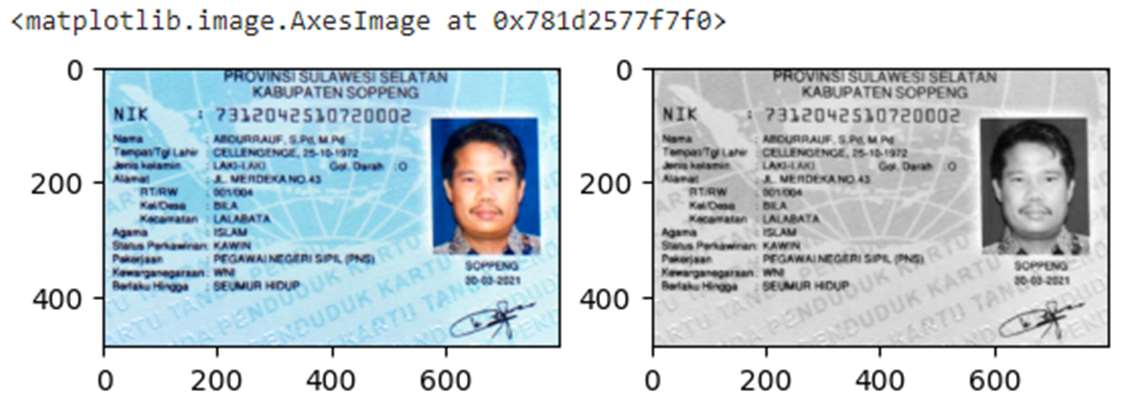


a. Averaging


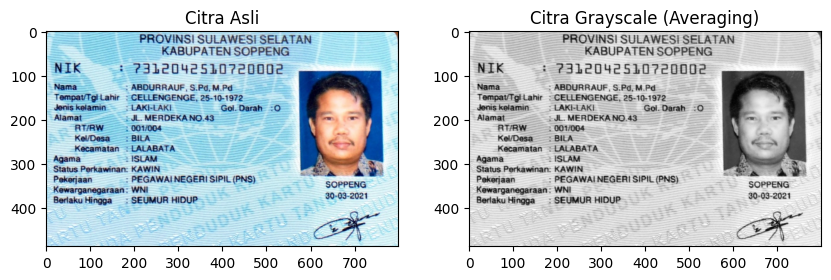

In [34]:
# AVERAGING

import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Membaca citra
image_path = ('/content/drive/MyDrive/PCVK/Week 3/KTP.jpg')
image = cv2.imread(image_path)

print('a. Averaging')

# Konversi citra ke grayscale menggunakan metode averaging
gray_image = np.mean(image, axis=2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

c. Luminance
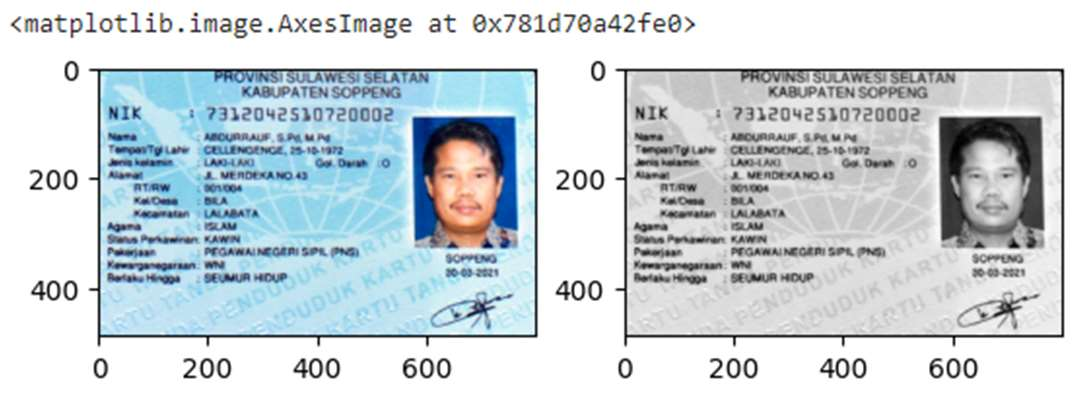

C. Luminance


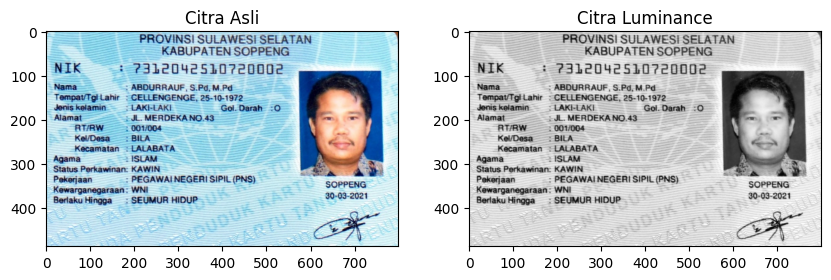

In [32]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Baca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Week 3/KTP.jpg')
inverse_image = np.zeros(original.shape, original.dtype)

print('C. Luminance')

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            r = original[y, x, 2]
            g = original[y, x, 1]
            b = original[y, x, 0]

            luminance = int(0.21 * r + 0.72 * g + 0.07 * b)

            inverse_image[y, x, c] = np.clip(luminance, 0, 255)

# Menampilkan citra asli
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('on')

# Menampilkan citra inversi
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(inverse_image, cv.COLOR_BGR2RGB))
plt.title('Citra Luminance')
plt.axis('on')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

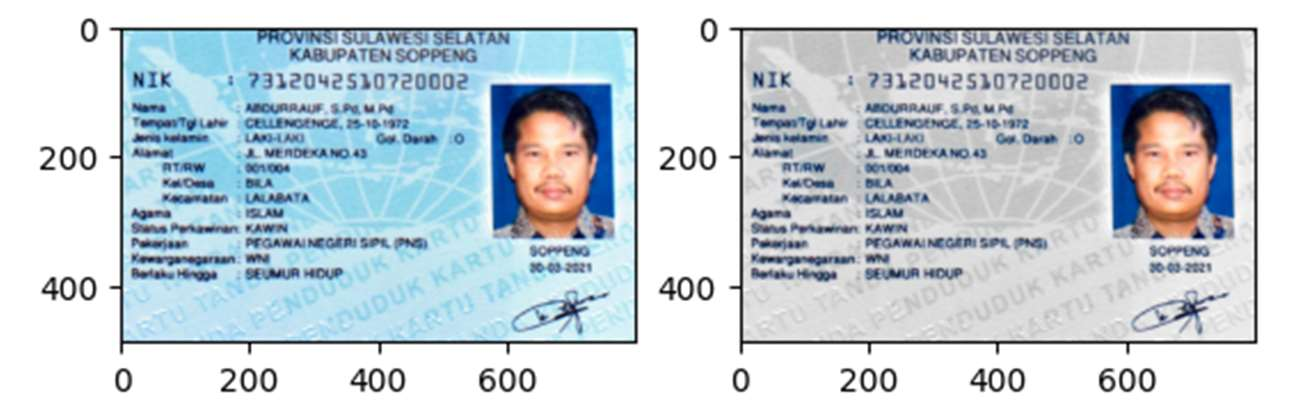

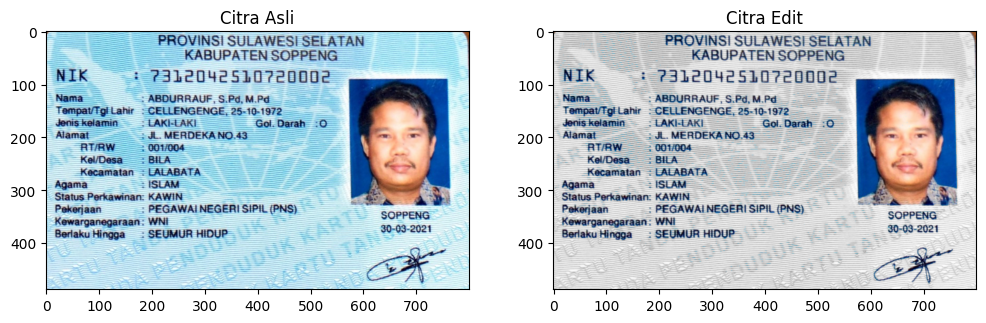

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Akses Citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Week 3/KTP.jpg')
image_2 = np.zeros_like(image)

# Akses per pixel
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    r = int(image[y, x, 2])
    g = int(image[y, x, 1])
    b = int(image[y, x, 0])

    average_grayscale = (r + g + b) / 3

    if (r < 252 and g > 0 and b > 200):
      image_2[y, x] = average_grayscale
    else:
      image_2[y, x] = image[y, x]

# Menampilkan Citra asli dan Citra Edit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.title('Citra Edit')

plt.show()